# <h1>Exploratory Data Analysis - Iris Dataset</h1>
### <a href= https://archive.ics.uci.edu/ml/datasets/iris> Public link to dataset <a/>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from fuzzyClass import FuzzyCMeans as fc

In [85]:
# Function to plot information detected
def plot_fuzzy_results(X, U, centroids, title="Fuzzy C-Means Clustering"):
    if U is None or centroids is None:
        raise ValueError("O modelo precisa ser ajustado antes de plotar os resultados.")
    
    # Definir paleta de cores com contraste maior entre clusters
    base_colors = ["#6a0dad", "#ffcc00", "#ff5733", "#33ff57", "#3357ff", "#ff33a1", "#a133ff", "#33fff2", "#ff8c33", "#a1ff33"]
    color_palette = base_colors[:U.shape[1]]  # Garantir que o número de cores corresponda aos clusters
    colors = np.array([mcolors.to_rgb(color) for color in color_palette])
    
    # Criar gradiente de cores para visualizar pertinências
    mixed_colors = np.einsum('ij,jk->ik', U, colors)  # Mistura ponderada das cores
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=mixed_colors, edgecolors='k', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()


# Function to format results
def format_fuzzy_results(U, centroids):
    results = []
    for i, u in enumerate(U):
        pertinences = ", ".join([f"w em K{k+1} = {u[k]:.4f}" for k in range(len(u))])
        results.append(f"Amostra {i+1} --> {pertinences}")
    
    centroid_positions = [f"Centroide {i+1}: ({', '.join(map(lambda x: f'{x:.4f}', centroid))})" for i, centroid in enumerate(centroids)]
    
    return "\n".join(results) + "\n\n" + "\n".join(centroid_positions)

# Method that shows the variable pair more correlated
def correlationOn(df):
    correlation_matrix = df.corr()

    max_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmax()
    max_corr_value = correlation_matrix.loc[max_corr]

    print(f"As variáveis mais correlacionadas são: {max_corr[0]} e {max_corr[1]} com correlação de {max_corr_value:.4f}")

In [86]:
tips = sns.load_dataset("iris")
irisDataFrame = pd.DataFrame(tips)

In [87]:
print(tips.head(3))
print(irisDataFrame.head(100))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1

#### **Set data ready to be used**

##### **Complete Iris --> Only values for implementation**

In [88]:
irisOnlyDataComplete = irisDataFrame[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [89]:
# Pegando apenas duas variaveis que se explicam em alta relação
correlationOn(irisOnlyDataComplete)

As variáveis mais correlacionadas são: petal_length e petal_width com correlação de 0.9629


In [90]:
irisDataCompleteUsedVar = irisOnlyDataComplete[["petal_length", "petal_width"]].values

##### **Partial Iris --> Virginica, Versicolor**

In [91]:
irisDataVerVir = irisDataFrame[(irisDataFrame.species == 'versicolor') | (irisDataFrame.species == 'virginica')]
irirOnlyVersicolorVirginica = irisDataVerVir[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [92]:
# Pegando apenas duas variaveis que se explicam em alta relação
correlationOn(irirOnlyVersicolorVirginica)

As variáveis mais correlacionadas são: sepal_length e petal_length com correlação de 0.8285


In [93]:
irisDataCutUsedVar = irirOnlyVersicolorVirginica[['sepal_length', 'petal_length']].values

##### **Aplicando o algoritmo**

##### **Base completa**

In [94]:
# Estruturando o objeto
fullDataBaseFuzzy = fc(irisDataCompleteUsedVar, n_clusters = 3)

# Aplicando o modelo
UResultFullBase, CentroidesFullBase = fullDataBaseFuzzy.fit_predict()

##### **Base apenas virginica e versicolor**

In [95]:
# Estruturando o objeto
cutDataBaseFuzzy = fc(irisDataCutUsedVar, n_clusters = 2)

# Aplicando o modelo
UResultCutBase, CentroidesCutBase = cutDataBaseFuzzy.fit_predict()

##### **Result plots**

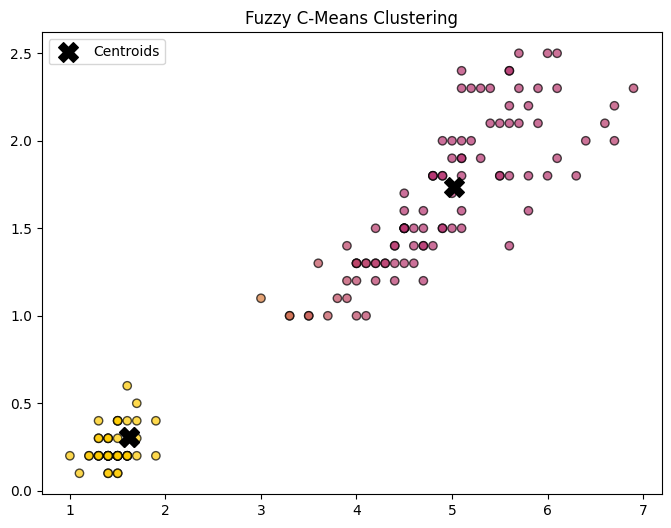

In [96]:
# Appling algorithm on full data base
plot_fuzzy_results(irisDataCompleteUsedVar, UResultFullBase, CentroidesFullBase)

In [97]:
# Resultados do modelo apresentado
print(format_fuzzy_results(UResultFullBase, CentroidesFullBase))

Amostra 1 --> w em K1 = 0.0039, w em K2 = 0.9922, w em K3 = 0.0039
Amostra 2 --> w em K1 = 0.0039, w em K2 = 0.9922, w em K3 = 0.0039
Amostra 3 --> w em K1 = 0.0070, w em K2 = 0.9861, w em K3 = 0.0070
Amostra 4 --> w em K1 = 0.0018, w em K2 = 0.9964, w em K3 = 0.0018
Amostra 5 --> w em K1 = 0.0039, w em K2 = 0.9922, w em K3 = 0.0039
Amostra 6 --> w em K1 = 0.0011, w em K2 = 0.9978, w em K3 = 0.0011
Amostra 7 --> w em K1 = 0.0032, w em K2 = 0.9937, w em K3 = 0.0032
Amostra 8 --> w em K1 = 0.0018, w em K2 = 0.9964, w em K3 = 0.0018
Amostra 9 --> w em K1 = 0.0039, w em K2 = 0.9922, w em K3 = 0.0039
Amostra 10 --> w em K1 = 0.0039, w em K2 = 0.9923, w em K3 = 0.0039
Amostra 11 --> w em K1 = 0.0018, w em K2 = 0.9964, w em K3 = 0.0018
Amostra 12 --> w em K1 = 0.0009, w em K2 = 0.9982, w em K3 = 0.0009
Amostra 13 --> w em K1 = 0.0058, w em K2 = 0.9884, w em K3 = 0.0058
Amostra 14 --> w em K1 = 0.0168, w em K2 = 0.9664, w em K3 = 0.0168
Amostra 15 --> w em K1 = 0.0109, w em K2 = 0.9783, w em K

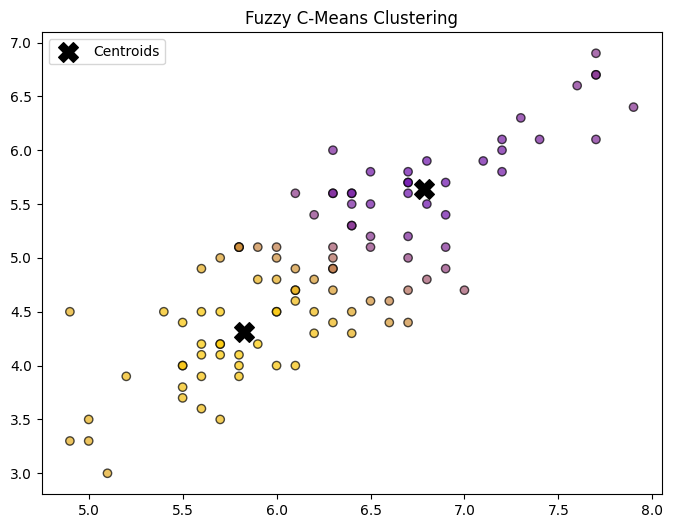

In [98]:
# Appling algorithm on particional data base
plot_fuzzy_results(irisDataCutUsedVar, UResultCutBase, CentroidesCutBase)

In [80]:
# Resultados do modelo aplicado
print(format_fuzzy_results(UResultCutBase, CentroidesCutBase))

Amostra 1 --> w em K1 = 0.6215, w em K2 = 0.3785
Amostra 2 --> w em K1 = 0.2012, w em K2 = 0.7988
Amostra 3 --> w em K1 = 0.7276, w em K2 = 0.2724
Amostra 4 --> w em K1 = 0.0446, w em K2 = 0.9554
Amostra 5 --> w em K1 = 0.3160, w em K2 = 0.6840
Amostra 6 --> w em K1 = 0.0206, w em K2 = 0.9794
Amostra 7 --> w em K1 = 0.2515, w em K2 = 0.7485
Amostra 8 --> w em K1 = 0.1722, w em K2 = 0.8278
Amostra 9 --> w em K1 = 0.3792, w em K2 = 0.6208
Amostra 10 --> w em K1 = 0.0919, w em K2 = 0.9081
Amostra 11 --> w em K1 = 0.1471, w em K2 = 0.8529
Amostra 12 --> w em K1 = 0.0061, w em K2 = 0.9939
Amostra 13 --> w em K1 = 0.0368, w em K2 = 0.9632
Amostra 14 --> w em K1 = 0.1436, w em K2 = 0.8564
Amostra 15 --> w em K1 = 0.0907, w em K2 = 0.9093
Amostra 16 --> w em K1 = 0.3327, w em K2 = 0.6673
Amostra 17 --> w em K1 = 0.0313, w em K2 = 0.9687
Amostra 18 --> w em K1 = 0.0132, w em K2 = 0.9868
Amostra 19 --> w em K1 = 0.0966, w em K2 = 0.9034
Amostra 20 --> w em K1 = 0.0472, w em K2 = 0.9528
Amostra 2